In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

In [7]:
df = pd.read_csv('_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,...,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,...,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,...,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79660611965,...,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525


In [18]:
l = []
for i in df['Цена']:
    i = i.split()
    l2 = []
    price = int(float(i[0]))
    l2.append(price)
    if 'Залог' in i:
        l2.append(True)
    else:
        l2.append(False)
    if 'Предоплата' in i:
        index_mounth = i.index('Предоплата')+1
        l2.append(int(i[index_mounth]))
    else:
        l2.append(0)
    if 'Коммунальные' and 'услуги' and 'включены,' in i:
        l2.append(True)
    else:
        l2.append(False)
    l.append(l2)
for i in l:
    if len(i) > 4:
        i.pop(1)
col = ['Стоимость', 'Залог', 'Предоплата в мес', 'Коммунальные услуги включены']
cost = pd.DataFrame(l, columns=col)
real_cost = pd.concat([df, cost], axis=1)
cost


,Стоимость,Залог,Предоплата в мес,Коммунальные услуги включены
0,500000,True,1,True
1,500000,True,1,True
2,500000,True,1,False
3,400000,True,1,False
4,225000,True,1,True
...,...,...,...,...
23363,42000,True,1,True
23364,45000,True,1,True
23365,50000,True,1,True
23366,55000,True,2,True


In [15]:
l2=[]
for i in real_cost['Адрес']:
    i = i.split()
    if 'Краснодарский' in i:
        l2.append('Сочи')
    else:
        l2.append(i[0][:-1])

col = ['Город']
cost2 = pd.DataFrame(l2, columns=col)
real_cost['Город'] = cost2['Город']
all_cities = real_cost

([0, 1, 2],
 [Text(0, 0, 'Москва'), Text(1, 0, 'Санкт-Петербург'), Text(2, 0, 'Сочи')])

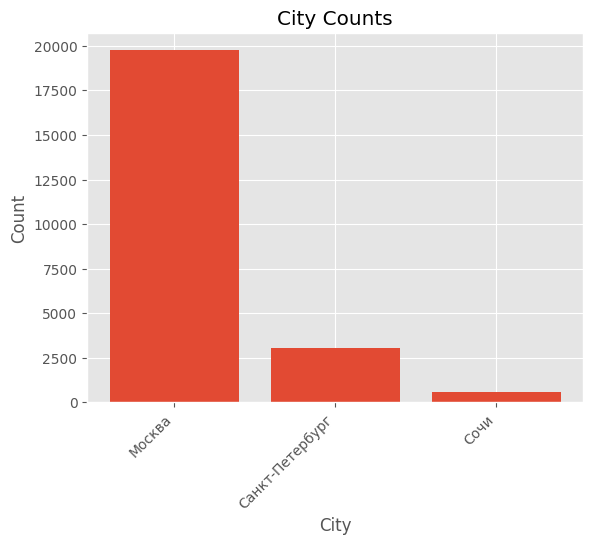

In [17]:
city_counts = all_cities['Город'].value_counts()
plt.style.use('ggplot')
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Counts')
plt.xticks(rotation=45, ha='right')

In [5]:
moscow = all_cities[all_cities['Город'] == 'Москва'].copy()
pattern = r"м.\s([^\n(]+)"
moscow['Метро'] = moscow['Метро'].str.extract(pattern)

In [6]:
plot = px.histogram(data_frame=moscow, x='Метро')
plot.update_xaxes(categoryorder="total descending")
plot.update_yaxes(title_text='Количество объявлений')
plot.update_layout(title_text="Распределение количества объявлений по станциям метро.", title_x=0.5)
plot


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'Метро=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['Смоленская ', 'Смоленская ', 'Смоленская ', ..., 'Солнцево ',
                          'Солнцево ', 'Говорово '], dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'Распределение количества объявлений по станциям метро.', 'x': 0.5},
               'xaxis': {'anchor': 'y',
                         'categoryorder': 'total descending',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Метро'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Количество объявлений'}}}
})

In [56]:
pattern = r"(\d+?)\.\d+.+За месяц"
moscow['Цена за месяц'] = moscow['Цена'].str.extract(pattern)
plot_1 = px.histogram(data_frame=moscow, x='Метро', y='Цена за месяц', histfunc='avg')
plot_1.update_xaxes(categoryorder="total descending")
plot_1.update_yaxes(title_text='Средняя цена за месяц')
plot_1.update_layout(title_text="Средняя цена за месяц аренды по станциям метро.", title_x=0.5)



C:\Users\Admin\AppData\Local\Temp\ipykernel_17784\4125254927.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
nan_counts = moscow.isna().sum()

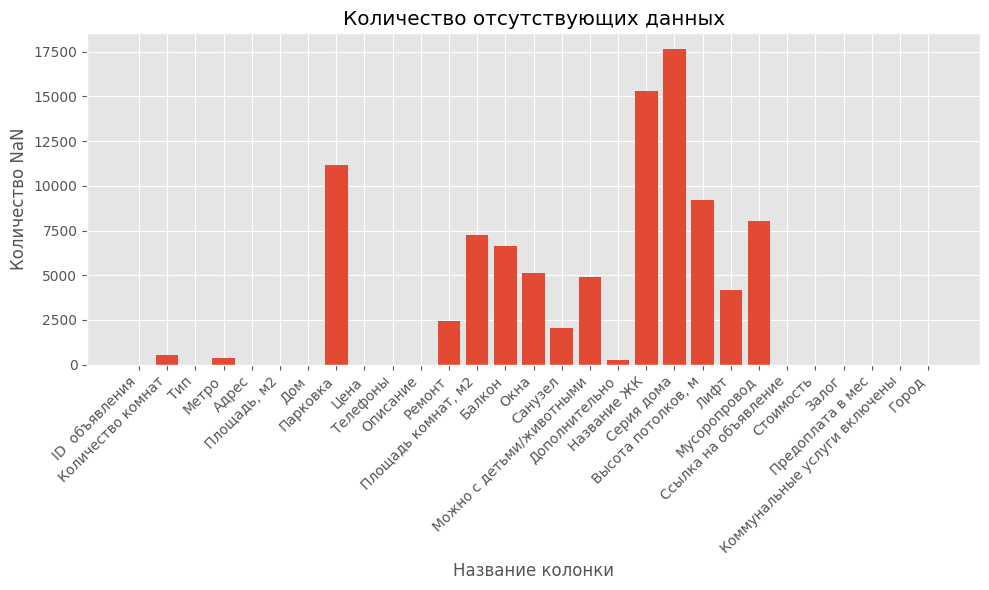

In [24]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.bar(nan_counts.index, nan_counts.values)
plt.xlabel('Название колонки')
plt.ylabel('Количество NaN')
plt.title('Количество отсутствующих данных')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()